In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error

In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/sales_train.csv', header = 0)

In [5]:
#df_train = pd.read_csv('/content/drive/MyDrive/sales_train.csv', header = 0)
df_train['date'] = pd.to_datetime(df_train['date'], format = "%Y-%m-%d")
df_sales = df_train.loc[(df_train['family'] == 'MAGAZINES') & (df_train['date'] >= '2014-01-01')].groupby(['date']).sum().copy()
df_sales = df_sales.loc[:, 'sales':'sales']

In [6]:
df_train.head(5)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0.0


In [7]:
df_train['date'] = pd.to_datetime(df_train['date'], format = "%Y-%m-%d")

In [8]:
df_sales = df_train.loc[(df_train['family'] == 'MAGAZINES') & (df_train['date'] >= '2014-01-01')].groupby(['date']).sum().copy()

In [9]:
df_sales = df_sales.loc[:, 'sales':'sales']

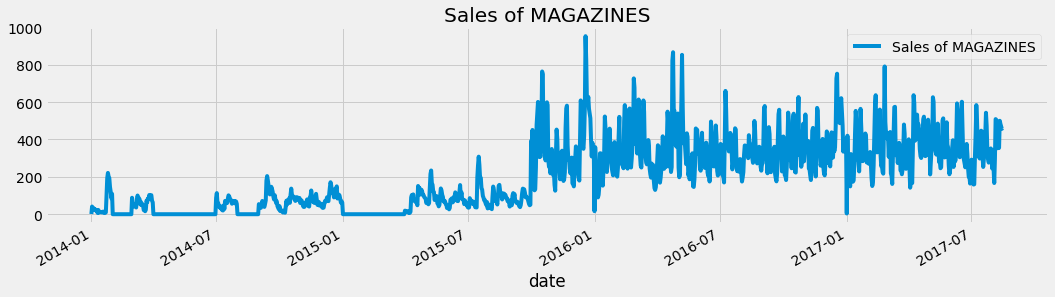

In [10]:
df_sales["sales"].plot(figsize=(16,4),legend=True)
plt.legend(['Sales of MAGAZINES'])
plt.title('Sales of MAGAZINES')
plt.show()

In [11]:
df_dataset = df_sales.copy()

Epoch 1/50
995/995 - 4s - loss: 0.0108 - accuracy: 0.2131 - 4s/epoch - 5ms/step
Epoch 2/50
995/995 - 2s - loss: 0.0061 - accuracy: 0.2131 - 2s/epoch - 2ms/step
Epoch 3/50
995/995 - 2s - loss: 0.0055 - accuracy: 0.2131 - 2s/epoch - 2ms/step
Epoch 4/50
995/995 - 2s - loss: 0.0043 - accuracy: 0.2131 - 2s/epoch - 2ms/step
Epoch 5/50
995/995 - 2s - loss: 0.0044 - accuracy: 0.2131 - 2s/epoch - 2ms/step
Epoch 6/50
995/995 - 2s - loss: 0.0041 - accuracy: 0.2131 - 2s/epoch - 2ms/step
Epoch 7/50
995/995 - 2s - loss: 0.0040 - accuracy: 0.2131 - 2s/epoch - 2ms/step
Epoch 8/50
995/995 - 2s - loss: 0.0039 - accuracy: 0.2131 - 2s/epoch - 2ms/step
Epoch 9/50
995/995 - 2s - loss: 0.0036 - accuracy: 0.2131 - 2s/epoch - 2ms/step
Epoch 10/50
995/995 - 2s - loss: 0.0036 - accuracy: 0.2131 - 2s/epoch - 2ms/step
Epoch 11/50
995/995 - 2s - loss: 0.0032 - accuracy: 0.2131 - 2s/epoch - 2ms/step
Epoch 12/50
995/995 - 2s - loss: 0.0032 - accuracy: 0.2131 - 2s/epoch - 2ms/step
Epoch 13/50
995/995 - 2s - loss: 0.00

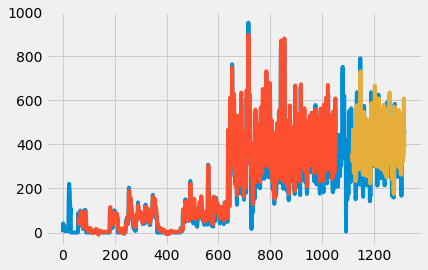

In [15]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataset = df_dataset
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 60
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(60, activation='relu', return_sequences=True, input_shape=(1, look_back)))
model.add(LSTM(30))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

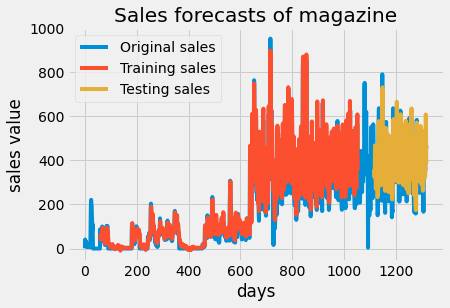

In [16]:
plt.plot(scaler.inverse_transform(dataset), label='Original sales')
plt.plot(trainPredictPlot, label='Training sales')
plt.plot(testPredictPlot, label='Testing sales')
plt.title("Sales forecasts of magazine")
plt.xlabel('days')
plt.ylabel('sales value')
plt.legend()
plt.show()